In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ParameterGrid

random_state = 42

In [29]:
data = pd.read_csv('./exam_2021_01_27.csv', header=None, names=[0,1,2,3,'y'])
data.head()

,0,1,2,3,y
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [30]:
data['y'] = data['y'].astype(str)
data.describe()

,0,1,3
count,141.000000,140.000000,137.000000
mean,5.897872,3.036429,1.290511
std,0.820232,0.437654,0.733934
min,4.300000,2.000000,0.100000
25%,5.200000,2.800000,0.400000
50%,5.800000,3.000000,1.400000
75%,6.400000,3.300000,1.800000
max,7.900000,4.400000,2.500000


In [31]:
print(f'shape of dataset: {data.shape}')

shape of dataset: (150, 5)


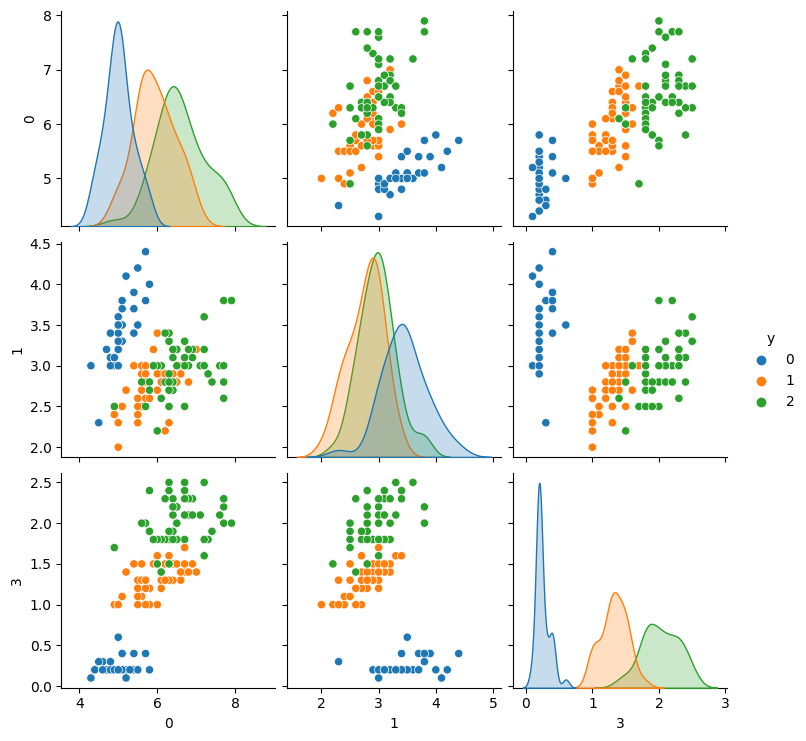

In [14]:
sns.pairplot(data, hue='y');

In [32]:
data = data[~data.isnull().any(axis=1)]
data.isnull().sum() > 0

0    False
1    False
2    False
3    False
y    False
dtype: bool

In [33]:
two = OrdinalEncoder().fit_transform(data[[2]])
data[2] = two

In [34]:
data.head()

,0,1,2,3,y
4,5.0,3.6,0.0,0.2,0
7,5.0,3.4,0.0,0.2,0
10,5.4,3.7,0.0,0.2,0
11,4.8,3.4,0.0,0.2,0
13,4.3,3.0,0.0,0.1,0


In [35]:
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'train set has {len(y_train)} elements, while test set has {len(y_test)} elements')

train set has 91 elements, while test set has 31 elements


In [60]:
tree = DecisionTreeClassifier(random_state=random_state)
tree.fit(X_train, y_train)
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
max_depth = tree.tree_.max_depth
print(f'accuracy on the train set is: {round(accuracy_score(y_train, y_pred_train) * 100, 2)}% with a depth of {max_depth}')
print(f'accuracy on the test set is:{round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

accuracy on the train set is: 100.0% with a depth of 4
accuracy on the test set is:83.87%


In [64]:
scores = []
parameters = range(1,max_depth + 1)
for depth in parameters:
    tree = DecisionTreeClassifier(max_depth=depth,random_state=random_state)
    score = cross_val_score(tree, X_train, y_train, scoring='accuracy')
    scores.append(np.mean(score))


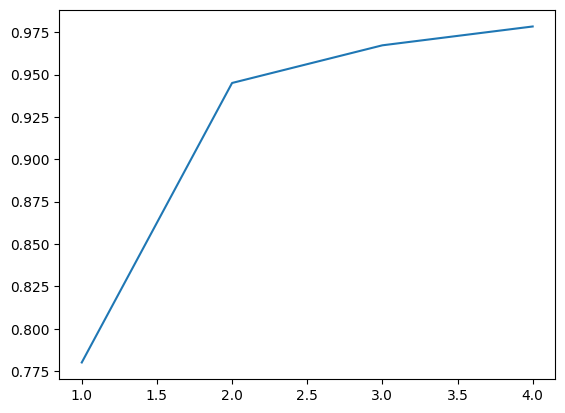

In [65]:
plt.plot(parameters, scores)
plt.show()

In [67]:
best_tree = DecisionTreeClassifier(max_depth=parameters[np.argmax(scores)], random_state=random_state)
best_tree.fit(X_train, y_train)
y_test_predicted = best_tree.predict(X_test)

accuracy on the test set is:83.87%


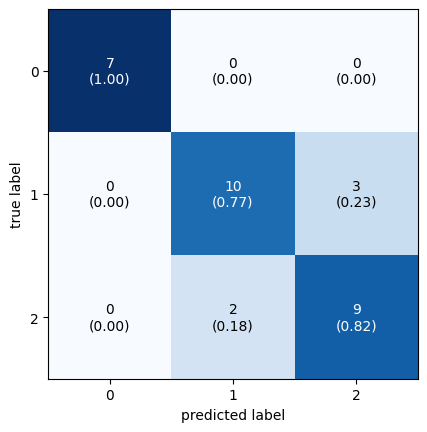

In [70]:
print(f'accuracy on the test set is:{round(accuracy_score(y_test, y_test_predicted) * 100, 2)}%')
plot_confusion_matrix(confusion_matrix(y_test, y_test_predicted), show_normed=True);

In [73]:
results = []
parameters = list(ParameterGrid({'n_estimators':[20,30,40,50], 'learning_rate':[0.5,0.75,1,1.25,1.5]}))
for i in range(len(parameters)):
    ada = AdaBoostClassifier(**(parameters[i]),random_state=random_state)
    score = cross_val_score(ada, X_train, y_train, scoring='accuracy')
    row = parameters[i].copy()
    row['accuracy'] = np.mean(score)
    row['i'] = i
    results.append(row)
    
results_df = pd.DataFrame(results)
results_df.sort_values(by='accuracy', ascending=False, inplace=True)
results_df.head()

,learning_rate,n_estimators,accuracy,i
10,1.00,40,0.967251,10
8,1.00,20,0.967251,8
11,1.00,50,0.956140,11
9,1.00,30,0.956140,9
7,0.75,50,0.945029,7


In [77]:
best_ada = AdaBoostClassifier(**(parameters[int(results_df.iloc[0]['i'])]),random_state=random_state)
best_ada.fit(X_train, y_train)
y_test_predicted = best_ada.predict(X_test)

accuracy on the test set is:93.55%


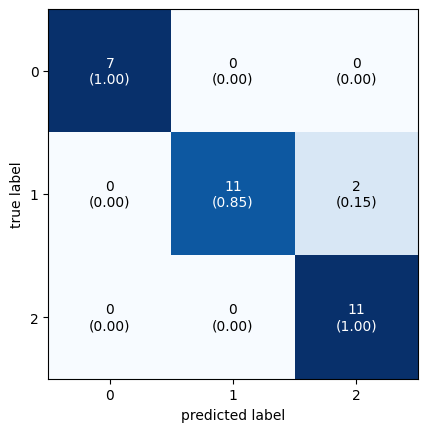

In [78]:
print(f'accuracy on the test set is:{round(accuracy_score(y_test, y_test_predicted) * 100, 2)}%')
plot_confusion_matrix(confusion_matrix(y_test, y_test_predicted), show_normed=True);